# Graph Building using networkx
Get familiar with networkx via their tutorial and then reformat the author names into a .gexf file and run some analysis. 

Assumptions: affiliations resolved author name clashes in previous stage.

In [314]:
import networkx as nx
import json
import itertools
import matplotlib.pyplot as plt
import time
import pandas as pd

In [103]:
G = nx.Graph()

In [104]:
[1,2] ==[2,1]

False

In [105]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e) 

In [106]:
G.add_edge(3,2)
G.add_edge(1,1)

In [107]:
list(G.nodes)


[1, 2, 3]

In [108]:
list(G.edges)


[(1, 2), (1, 1), (2, 3)]

In [109]:
with open('author_proc_1706394745.6445088.json') as f: 
    data = f.read() 
proc_auths_all = json.loads(data) 

In [83]:
my_list=[3,1,3,4]
combinations = list(itertools.combinations(my_list, 2))
print(combinations)


[(3, 1), (3, 3), (3, 4), (1, 3), (1, 4), (3, 4)]


In [84]:
G.has_edge(2, 3)

True

In [111]:
G.has_node(4)

False

In [85]:
list(nx.connected_components(G))


[{1, 2, 3}]

In [86]:
sorted(d for n, d in G.degree())


[1, 2, 3]

In [87]:
nx.clustering(G)


{1: 0, 2: 0, 3: 0}

In [88]:
sp = dict(nx.all_pairs_shortest_path(G))

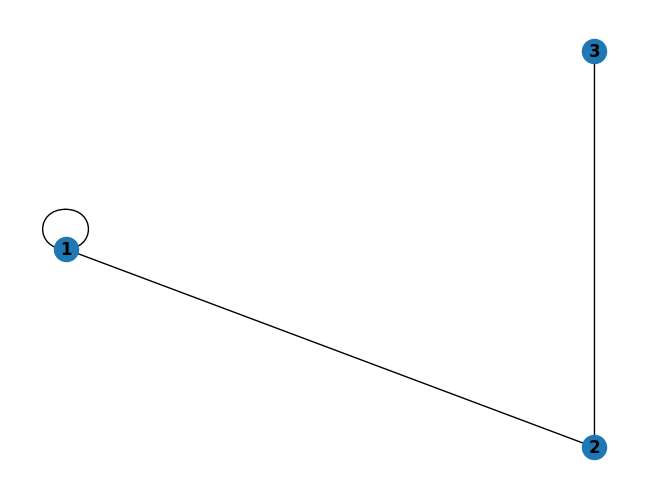

In [91]:
nx.draw_shell(G, with_labels=True, font_weight='bold')


In [366]:
def build_graph(start_year, end_year, al_class):
    a=0
    b=[]
    c=[]
    content_type=[]
    years=2021
    G = nx.Graph()
    alias_all=[]
    for i in proc_auths_all.keys():
#         a=a+1
#         if a>1000:
#             break
        alias=[]
        entry=proc_auths_all[i]["authors"]
        years=min(years, proc_auths_all[i]["year"])
        content_type.append(proc_auths_all[i]["content_type"])
        if (proc_auths_all[i]["year"]<start_year) or (proc_auths_all[i]["year"]>=end_year):
            continue
        for j in range(len(entry.keys())):
            alias.append(entry[str(j)][al_class])
            alias_all.append(entry[str(j)][al_class])
        combinations = list(itertools.combinations(alias, 2))

        for l in alias:
            if G.has_node(l):
                n_count=len(G.nodes[l]["year"])
                G.nodes[l]["year"][n_count]=proc_auths_all[i]["year"]
            else:
                G.add_node(l, year={0: proc_auths_all[i]["year"]})

        for k in combinations:
            if G.has_edge(*k):
                # we added this one before, just increase the weight by one
                G[k[0]][k[1]]['weight'] += 1
                e_count=len(G[k[0]][k[1]]['year'])
                G[k[0]][k[1]]['year']['e_count']=proc_auths_all[i]["year"]
            else:
                # new edge. add with weight=1
                G.add_edge(*k, weight=1, year={0:proc_auths_all[i]["year"]})
#     G=nx.convert_node_labels_to_integers(G, first_label=0, ordering='sorted', label_attribute="auth_name")
    print(content_type.value_counts())
    return [G, alias_all, years, b]


In [320]:
def calc_network_stats(G):
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    G1 = G.subgraph(Gcc[1])
    G2 = G.subgraph(Gcc[2])
    return {
        "Number of nodes": G.number_of_nodes(),
        "Number of CC": nx.number_connected_components(G),
        "LCC": len(G0),
        "2nd LCC": len(G1),
        "3rd LCC": len(G2),
        "AVG clustering": nx.average_clustering(G),
        "centers of LCC":list(nx.center(G0))

    }


In [367]:
output=build_graph(1800, 2021, "a1")
L=output[0]


AttributeError: 'list' object has no attribute 'value_counts'

In [350]:
L.number_of_nodes()

22210

In [ ]:
nx.write_gexf(L, "testnetwork_"+str(time.time())+".gexf")


In [351]:
Gcc = sorted(nx.connected_components(L), key=len, reverse=True)
L0=L.subgraph(Gcc[0])

In [334]:
author=list(L)
L_stat=calc_network_stats(L)


In [353]:
L_stat

{'Number of nodes': 22210,
 'Number of CC': 9438,
 'LCC': 9741,
 '2nd LCC': 33,
 '3rd LCC': 24,
 'AVG clustering': 0.26207822080544535,
 'centers': ['joshua angrist', 'victor lavy', 'joshua d. angrist']}

In [338]:
pd.DataFrame(L_stat)


,Number of nodes,Number of CC,LCC,2nd LCC,3rd LCC,AVG clustering,centers
0,22210,9438,9741,33,24,0.262078,joshua angrist
1,22210,9438,9741,33,24,0.262078,victor lavy
2,22210,9438,9741,33,24,0.262078,joshua d. angrist


In [336]:
networks={}
j=0
data=[]
for i in range(1881,2021,10):
    output=build_graph(i, i+10, "a1")
    networks[j]={"graph":output[0], "start":i, "end": i+10}
    op=calc_network_stats(output[0])
    op["start"]=i
    op['end']=i+10
    data.append(op)
    nx.write_gexf(output[0], "network_"+str(i)+"_"+str(i+10)+"_"+str(time.time())+".gexf")

df=pd.DataFrame(data)
df.to_excel("rolling_10Y_network_summary_"+str(time.time())+".xlsx", index=False)    


In [337]:
pd.set_option('max_colwidth', None)

df

,Number of nodes,Number of CC,LCC,2nd LCC,3rd LCC,AVG clustering,centers,start,end
0,64,61,2,2,2,0.000000,"[s. m. macvane, uriel h. crocker]",1881,1891
1,312,302,3,2,2,0.000000,[w. j. a.],1891,1901
2,420,395,16,3,2,0.038095,"[a. s. johnson, charles h. judd, ulysses g. weatherly, robert c. chapin, w. e. hotchkiss, h. s. smalley, l. c. marshall, j. l. laughlin, william a. scott, m. s. wildman, harry p. judson, frank t. carlton, john h. gray, a. b. wolfe, r. f. hoxie, george g. groat]",1901,1911
3,1051,780,232,11,8,0.196348,"[e. d. durand, j. m. clark, roy g. blakey]",1911,1921
4,1042,799,85,30,29,0.189507,"[john d. black, sumner h. slichter]",1921,1931
5,1763,1358,190,16,11,0.163981,"[calvin b. hoover, michael t. florinsky, william orton]",1931,1941
6,2022,1524,177,99,25,0.161331,"[joseph s. davis, frederick c. mills, eveline m. burns, norman s. buchanan, frank h. knight, donald h. wallace, dickson h. leavens, seymour e. harris, edward s. mason, paul t. homan, morris a. copeland, albert b. wolfe, jules backman, joseph j. spengler, e. a. goldenweiser, aryness j. wickens, dexter m. keezer, edward chamberlin, fritz machlup]",1941,1951
7,2597,2006,155,33,13,0.125044,[melvin g. d. chazeau],1951,1961
8,3324,2410,282,29,17,0.104898,"[challis a. hall, herbert stein]",1961,1971
9,3742,2323,179,55,21,0.118365,[joseph e. stiglitz],1971,1981


In [361]:
output=build_graph(2010, 2020, "a1")
L=output[0]

In [362]:

def plot_a_net(L, start, end):
    plt.figure()
    text="network graph of econ journal authors between "+str(start)+" and "+str(end)+" (exclusive). Nodes="+str(L.number_of_nodes())+". Edges="+str(L.number_of_edges())+'.'
    plt.title(text)
    nx.draw_spectral(L, with_labels=True, font_weight='light', node_size=5, font_size=5)
    plt.show()